In [195]:
import random
import os
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path
from configuration_model import cm_model

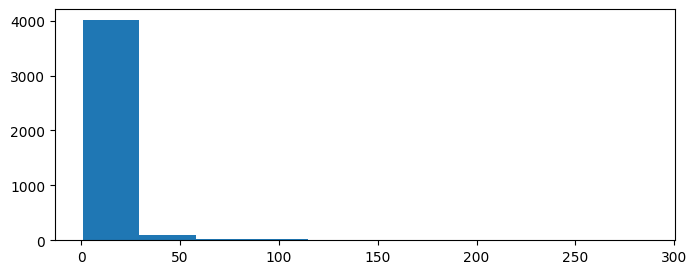

In [190]:
subdir = 'data/real/Cost'
file_name = "HI-II-14_degree.gml"
data_path = Path.cwd() / subdir
original_graph = nx.read_gml(data_path / file_name)
degrees = [original_graph.degree(n) for n in original_graph.nodes()]
plt.figure(figsize=(8,3))
plt.hist(degrees)
plt.show()

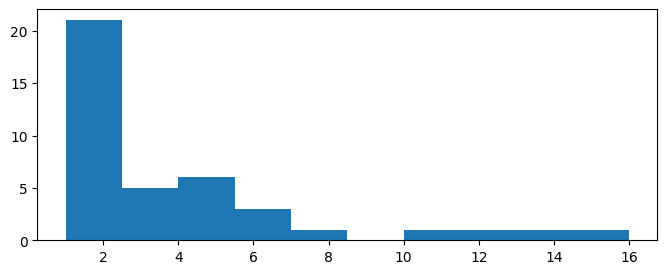

In [191]:
# single graph generation via CM model
file_name = "HI-II-14_degree.gml"
n_samples = 40
G = cm_model(file_name, n_samples)
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(8,3))
plt.hist(degrees)
plt.show()

In [199]:
graph_name = "Crime_degree.gml"
for i in range(10):

    graph = cm_model(graph_name, random.randint(30,50))
    print(len(graph.nodes()))
    subdir = 'data/cm/Crime'
    file_name = f"g_{i}.gml"
    file_path = Path.cwd()/subdir/file_name
    
    nx.write_gml(graph, file_path)

    print(f"Graph {i} saved to {file_path}")

47
Graph 0 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\Crime\g_0.gml
40
Graph 1 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\Crime\g_1.gml
36
Graph 2 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\Crime\g_2.gml
38
Graph 3 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\Crime\g_3.gml
46
Graph 4 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\Crime\g_4.gml
44
Graph 5 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\Crime\g_5.gml
48
Graph 6 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\Crime\g_6.gml
44
Graph 7 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\Crime\g_7.gml
41
Graph 8 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\Crime\g_8.gml
50
Graph 9 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\Crime\g_9.gml
